**Diabetes prediction**





In [36]:
# Here importing the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [21]:
# importing data
dataset=pd.read_csv('diabetes.csv')
dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [6]:
# checking whether there are any missing values
# here non-null indicates non-empty
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
# here .isnull() function gives .csv file where if value is null then True else False and .sum() method gives the sum of columns 1 for True and 0 for False
# This checking is helpful in real time
dataset.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [11]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


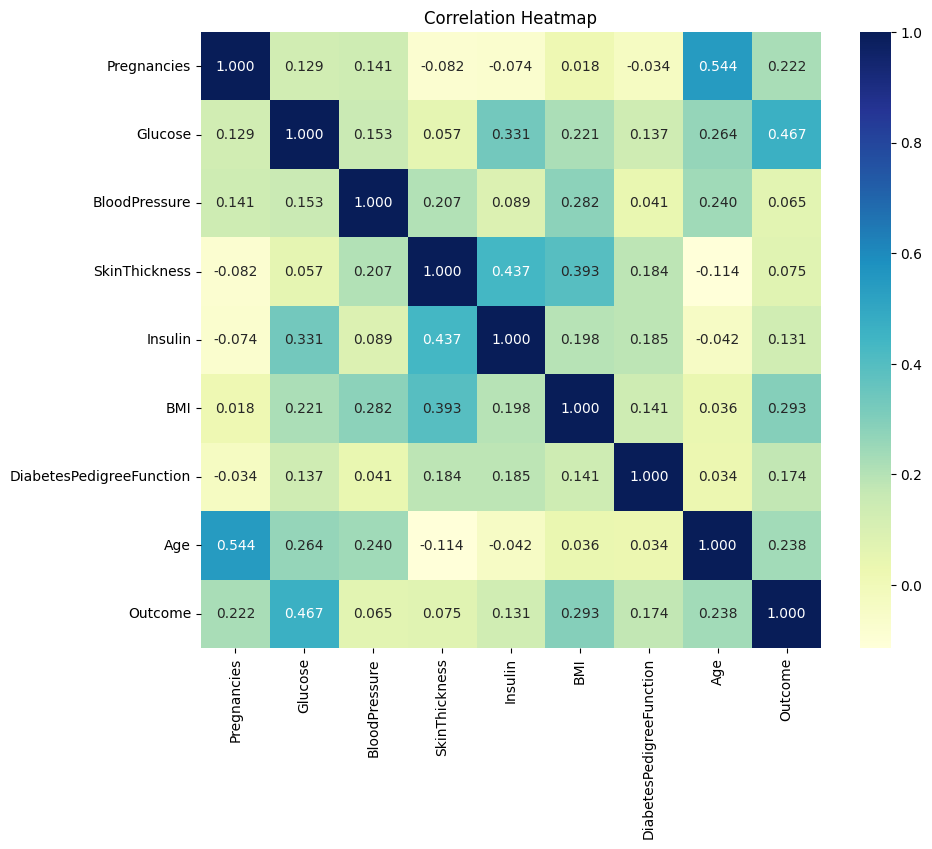

In [19]:
# Correlation plot of independent variables
plt.figure(figsize=(10,8))
sns.heatmap(dataset.corr(),annot=True,fmt='.3f',cmap='YlGnBu')
plt.title("Correlation Heatmap")
plt.show()

<ipython-input-26-b4e0c44d7d9e>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  kde = sns.kdeplot(dataset['Pregnancies'][dataset['Outcome']==1],shade=True,color='r')
<ipython-input-26-b4e0c44d7d9e>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  kde = sns.kdeplot(dataset['Pregnancies'][dataset['Outcome']==0],shade=True,color='b')


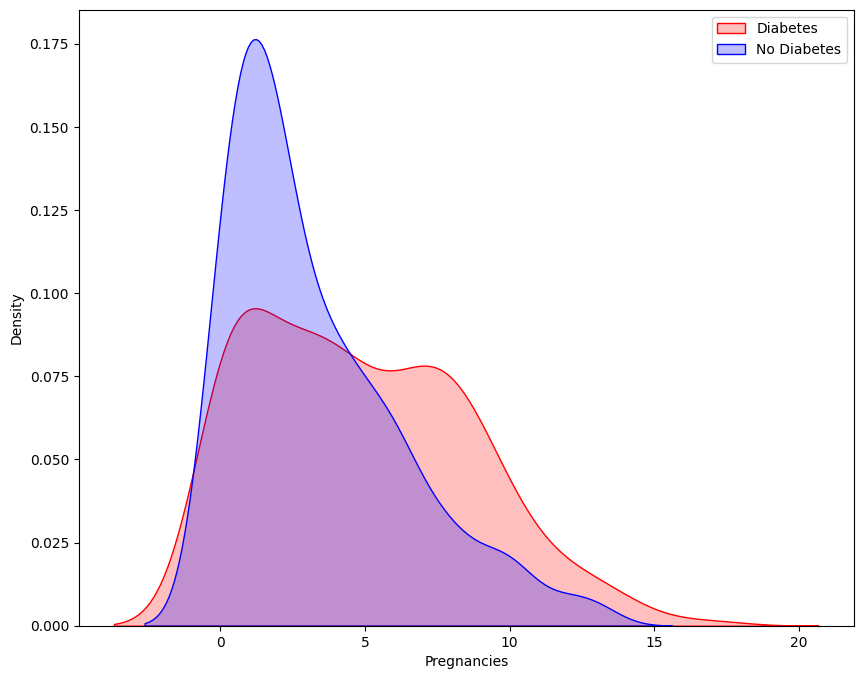

In [26]:
# Exploring Pregnancy and target variables
plt.figure(figsize=(10,8))
# Plotting Density function graph of the pregnancies and target variables
kde = sns.kdeplot(dataset['Pregnancies'][dataset['Outcome']==1],shade=True,color='r')
kde = sns.kdeplot(dataset['Pregnancies'][dataset['Outcome']==0],shade=True,color='b')
kde.set_xlabel('Pregnancies')
kde.set_ylabel('Density')
kde.legend(['Diabetes','No Diabetes'])

<Axes: xlabel='Outcome', ylabel='Glucose'>

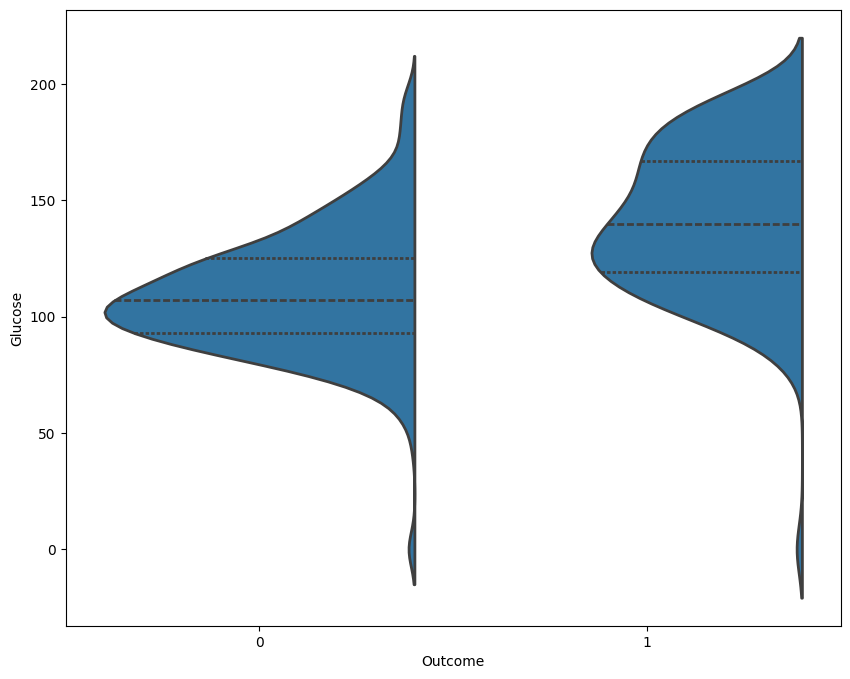

In [28]:
# Exploring Glucose and target variables
plt.figure(figsize=(10,8))
sns.violinplot(data=dataset,x='Outcome',y='Glucose',split=True, linewidth=2, inner='quartile')

# here in the below plot you can see that when the glucose is around 150-200 also some are not having diabetes this indicates that outcome is effected by other features as well.

In [29]:
# Replace 0 values with the mean/median of the respective feature
# Glucose
dataset['Glucose']=dataset['Glucose'].replace(0,dataset['Glucose'].median())
# BloodPressure
dataset['BloodPressure']=dataset['BloodPressure'].replace(0,dataset['BloodPressure'].median())
# BMI
dataset['BMI']=dataset['BMI'].replace(0,dataset['BloodPressure'].mean())
# SkinThickness
dataset['SkinThickness']=dataset['SkinThickness'].replace(0,dataset['SkinThickness'].mean())
# BloodPressure
dataset['Insulin']=dataset['Insulin'].replace(0,dataset['Insulin'].mean())

In [30]:
dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35.000000,79.799479,33.6,0.627,50,1
1,1,85,66,29.000000,79.799479,26.6,0.351,31,0
2,8,183,64,20.536458,79.799479,23.3,0.672,32,1
3,1,89,66,23.000000,94.000000,28.1,0.167,21,0
4,0,137,40,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48.000000,180.000000,32.9,0.171,63,0
764,2,122,70,27.000000,79.799479,36.8,0.340,27,0
765,5,121,72,23.000000,112.000000,26.2,0.245,30,0
766,1,126,60,20.536458,79.799479,30.1,0.349,47,1


In [35]:
# Splitting the dependent and independent variables
X = dataset.drop('Outcome',axis=1)
Y = dataset['Outcome']

In [34]:
# Splitting the dataset into training and testing dataset
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.33,random_state=42)

In [38]:
# KNN
from sklearn.neighbors import KNeighborsClassifier

In [40]:
training_accuracy=[]
test_accuracy=[]
for n_neighbors in range(1,11):
    knn=KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train,Y_train)

    # check accuracy score
    training_accuracy.append(knn.score(X_train,Y_train))
    test_accuracy.append(knn.score(X_test,Y_test))

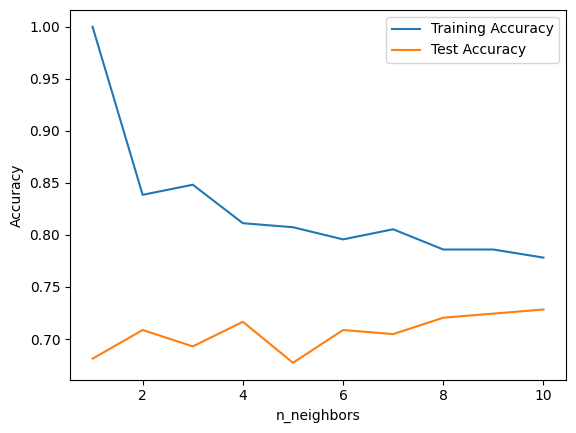

In [42]:
plt.plot(range(1,11),training_accuracy)
plt.plot(range(1,11),test_accuracy)
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.show()

In [ ]:
# By the above graph it is clear that 9 or 10 neighbours is the best fit the given data

In [44]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train,Y_train)

# check accuracy score
print("Training Accuracy:",knn.score(X_train,Y_train))
print("Test Accuracy:",knn.score(X_test,Y_test))

Training Accuracy: 0.7782101167315175
Test Accuracy: 0.7283464566929134


In [46]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train,Y_train)
print("Training Accuracy:",dt.score(X_train,Y_train))
print("Test Accuracy:",dt.score(X_test,Y_test))

Training Accuracy: 1.0
Test Accuracy: 0.7204724409448819


In [49]:
# now we change the depth of decision tree to see what are the changes

dt = DecisionTreeClassifier(random_state=42,max_depth=5)
dt.fit(X_train,Y_train)
print("Training Accuracy:",dt.score(X_train,Y_train))
print("Test Accuracy:",dt.score(X_test,Y_test))

Training Accuracy: 0.8443579766536965
Test Accuracy: 0.7283464566929134


In [50]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(random_state=42)
mlp.fit(X_train,Y_train)
print("Training Accuracy:",mlp.score(X_train,Y_train))
print("Test Accuracy:",mlp.score(X_test,Y_test))

Training Accuracy: 0.7509727626459144
Test Accuracy: 0.6929133858267716


In [51]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

In [52]:
mlp = MLPClassifier(random_state=42)
mlp.fit(X_train_scaled,Y_train)
print("Training Accuracy:",mlp.score(X_train_scaled,Y_train))
print("Test Accuracy:",mlp.score(X_test_scaled,Y_test))

Training Accuracy: 0.8365758754863813
Test Accuracy: 0.7362204724409449


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
